# SimpleChat-bots

Chat-bot Automat Question and Answering.
The chatbot project is comes under NLP text classification it is developed on the basis or for the purpose of solving the user queries
Installing the neattext library using pip

In [22]:
#Importing all the necessary librarys
import numpy as np
import pandas as pd
import neattext.functions as ntf 
import string
import nltk
import random
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

In [26]:
sn=pd.read_csv("C:\pythonclass\Data Science\Datasets\Deep learning datasets\simple chatbot.txt",sep='\t',names=['questions','answers'])
sn
# The above data set consists of the general questions and its answers by analyzing it any doing text preprocessing

,questions,answers
0,"hi, how are you doing?",i'm fine. how about yourself?
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
2,i'm pretty good. thanks for asking.,no problem. so how have you been?
3,no problem. so how have you been?,i've been great. what about you?
4,i've been great. what about you?,i've been good. i'm in school right now.
...,...,...
3720,that's a good question. maybe it's not old age.,are you right-handed?
3721,are you right-handed?,yes. all my life.
3722,yes. all my life.,you're wearing out your right hand. stop using...
3723,you're wearing out your right hand. stop using...,but i do all my writing with my right hand.


In [28]:
#Creating the greetings and its responses which makes the chatbot more user friendlly 
user_greetings=["hello",'hi','hai','hiii','hii robo','hai robo','hello how are you doing']
greeting_response=['hai','hello','hi thanks for asking how are you doing']

In [30]:
# cleaning the text by using the neattext library
sn['clean_questions']=sn['questions'].apply(ntf.remove_userhandles)
sn['clean_questions']=sn['clean_questions'].apply(ntf.remove_punctuations)
sn['clean_answers']=sn['answers'].apply(ntf.remove_userhandles)
sn['clean_answers']=sn['clean_answers'].apply(ntf.remove_punctuations)
sn

,questions,answers,clean_questions,clean_answers
0,"hi, how are you doing?",i'm fine. how about yourself?,hi how are you doing,im fine how about yourself
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.,im fine how about yourself,im pretty good thanks for asking
2,i'm pretty good. thanks for asking.,no problem. so how have you been?,im pretty good thanks for asking,no problem so how have you been
3,no problem. so how have you been?,i've been great. what about you?,no problem so how have you been,ive been great what about you
4,i've been great. what about you?,i've been good. i'm in school right now.,ive been great what about you,ive been good im in school right now
...,...,...,...,...
3720,that's a good question. maybe it's not old age.,are you right-handed?,thats a good question maybe its not old age,are you righthanded
3721,are you right-handed?,yes. all my life.,are you righthanded,yes all my life
3722,yes. all my life.,you're wearing out your right hand. stop using...,yes all my life,youre wearing out your right hand stop using i...
3723,you're wearing out your right hand. stop using...,but i do all my writing with my right hand.,youre wearing out your right hand stop using i...,but i do all my writing with my right hand


In [32]:
# creating the pipeline
pipe=Pipeline(steps=[('bow', CountVectorizer()),('tfidf', TfidfTransformer()),('dt', DecisionTreeClassifier())])
pipe.fit(sn['clean_questions'], sn['clean_answers']) # fitting the data on model

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('dt', DecisionTreeClassifier())])

In [38]:
# automatic question-answering chat-bot development
print("Robo: Wellcome I am Robo I am here to help you regarding all yours questions")
print('--'*30)
user=input("Enter your response:")
for i in list(user_greetings):
    if user==i:
        print(random.choice(greeting_response))
        print('Robo: Please type your question. If you have no question then type bye')
        while True :
            question=input('Robo: Enter your question here :')
            q1=pipe.predict([question])[0]
            print('Robo :',q1)
            if (question=='bye'or question=='thank you bye'or question=='ok bike'or question=='bye robo'or question=='thanks robo bye'):
                print('Robo: bye thanks you for your coperation')
                break
        else :
            print('sorry i dont have any idea about your question,thanks for asking if you have any other question start the conversation else type bye')

Robo: Wellcome I am Robo I am here to help you regarding all yours questions
------------------------------------------------------------


Enter your response: hi


hai
Robo: Please type your question. If you have no question then type bye


Robo: Enter your question here : What is AI


Robo : yes its on every afternoon


Robo: Enter your question here : are you an AI


Robo : its almost empty


Robo: Enter your question here : your response is not correct


Robo : why not


Robo: Enter your question here : 


Robo : what do you mean


Robo: Enter your question here : bye


Robo : what do you mean
Robo: bye thanks you for your coperation


# ChatBot

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras 
from keras.layers import Dense
import json 
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
import unicodedata
from sklearn.model_selection import train_test_split

In [3]:
question  =[]
answer = []
with open("C:/pythonclass/Data Science/Datasets/Deep learning datasets/dialogs.txt",'r') as f :
    for line in f :
        line  =  line.split('\t')
        question.append(line[0])
        answer.append(line[1])
print(len(question) == len(answer))

True


In [5]:
question[:5]

['hi, how are you doing?',
 "i'm fine. how about yourself?",
 "i'm pretty good. thanks for asking.",
 'no problem. so how have you been?',
 "i've been great. what about you?"]

In [7]:
answer[:5]

["i'm fine. how about yourself?\n",
 "i'm pretty good. thanks for asking.\n",
 'no problem. so how have you been?\n',
 "i've been great. what about you?\n",
 "i've been good. i'm in school right now.\n"]

In [9]:
answer = [ i.replace("\n","") for i in answer]

In [11]:
answer[:5]

["i'm fine. how about yourself?",
 "i'm pretty good. thanks for asking.",
 'no problem. so how have you been?',
 "i've been great. what about you?",
 "i've been good. i'm in school right now."]

In [13]:
data = pd.DataFrame({"question" : question ,"answer":answer})
data.head()

,question,answer
0,"hi, how are you doing?",i'm fine. how about yourself?
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
2,i'm pretty good. thanks for asking.,no problem. so how have you been?
3,no problem. so how have you been?,i've been great. what about you?
4,i've been great. what about you?,i've been good. i'm in school right now.


In [15]:
def unicode_to_ascii(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s)
      if unicodedata.category(c) != 'Mn')

In [17]:
def clean_text(text):
    text = unicode_to_ascii(text.lower().strip())
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"\r", "", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"what's", "that is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"how's", "how is", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"n'", "ng", text)
    text = re.sub(r"'bout", "about", text)
    text = re.sub(r"'til", "until", text)
    text = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", text)
    text = text.translate(str.maketrans('', '', string.punctuation)) 
    text = re.sub("(\\W)"," ",text) 
    text = re.sub('\S*\d\S*\s*','', text)
    text =  "<sos> " +  text + " <eos>"
    return text

In [19]:
data["question"][0]

'hi, how are you doing?'

In [21]:
data["question"] = data.question.apply(clean_text)

In [23]:
data["question"][0]

'<sos> hi how are you doing <eos>'

In [25]:
data["answer"] = data.answer.apply(clean_text)

In [27]:
question  = data.question.values.tolist()
answer =  data.answer.values.tolist()

In [29]:
def tokenize(lang):
    lang_tokenizer = tf.keras.preprocessing.text.Tokenizer(
      filters='')
    lang_tokenizer.fit_on_texts(lang)
    tensor = lang_tokenizer.texts_to_sequences(lang)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor,
                                                         padding='post')

    return tensor, lang_tokenizer

In [31]:
input_tensor , inp_lang  =  tokenize(question)

In [33]:
target_tensor , targ_lang  =  tokenize(answer)

In [35]:
def remove_tags(sentence):
    return sentence.split("<start>")[-1].split("<end>")[0]

In [37]:
max_length_targ, max_length_inp = target_tensor.shape[1], input_tensor.shape[1]

In [39]:
# Creating training and validation sets using an 80-20 split
input_tensor_train, input_tensor_val, target_tensor_train, target_tensor_val = train_test_split(input_tensor, target_tensor, test_size=0.2)

In [41]:
BUFFER_SIZE = len(input_tensor_train)
BATCH_SIZE = 64
steps_per_epoch = len(input_tensor_train)//BATCH_SIZE
embedding_dim = 256
units = 1024
vocab_inp_size = len(inp_lang.word_index)+1
vocab_tar_size = len(targ_lang.word_index)+1

dataset = tf.data.Dataset.from_tensor_slices((input_tensor_train, target_tensor_train)).shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)

example_input_batch, example_target_batch = next(iter(dataset))
example_input_batch.shape, example_target_batch.shape

(TensorShape([64, 22]), TensorShape([64, 22]))

In [43]:
class Encoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, enc_units, batch_sz):
        super(Encoder, self).__init__()
        self.batch_sz = batch_sz
        self.enc_units = enc_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(self.enc_units,
                                       return_sequences=True,
                                       return_state=True,
                                       recurrent_initializer='glorot_uniform')

    def call(self, x,hidden):
        x = self.embedding(x)
        output, state = self.gru(x, initial_state = hidden)
        return output, state
    
    def initialize_hidden_state(self):
        return tf.zeros((self.batch_sz, self.enc_units))

In [45]:
encoder = Encoder(vocab_inp_size, embedding_dim, units, BATCH_SIZE)

# sample input
sample_hidden = encoder.initialize_hidden_state()
sample_output, sample_hidden = encoder(example_input_batch, sample_hidden)
print ('Encoder output shape: (batch size, sequence length, units) {}'.format(sample_output.shape))
print ('Encoder Hidden state shape: (batch size, units) {}'.format(sample_hidden.shape))

Encoder output shape: (batch size, sequence length, units) (64, 22, 1024)
Encoder Hidden state shape: (batch size, units) (64, 1024)


In [47]:
class BahdanauAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, query, values):
        # query hidden state shape == (batch_size, hidden size)
        # query_with_time_axis shape == (batch_size, 1, hidden size)
        # values shape == (batch_size, max_len, hidden size)
        # we are doing this to broadcast addition along the time axis to calculate the score
        query_with_time_axis = tf.expand_dims(query, 1)

        # score shape == (batch_size, max_length, 1)
        # we get 1 at the last axis because we are applying score to self.V
        # the shape of the tensor before applying self.V is (batch_size, max_length, units)
        score = self.V(tf.nn.tanh(
            self.W1(query_with_time_axis) + self.W2(values)))

        # attention_weights shape == (batch_size, max_length, 1)
        attention_weights = tf.nn.softmax(score, axis=1)

        # context_vector shape after sum == (batch_size, hidden_size)
        context_vector = attention_weights * values
        context_vector = tf.reduce_sum(context_vector, axis=1)

        return context_vector, attention_weights

In [49]:
attention_layer = BahdanauAttention(10)
attention_result, attention_weights = attention_layer(sample_hidden, sample_output)

print("Attention result shape: (batch size, units) {}".format(attention_result.shape))
print("Attention weights shape: (batch_size, sequence_length, 1) {}".format(attention_weights.shape))

Attention result shape: (batch size, units) (64, 1024)
Attention weights shape: (batch_size, sequence_length, 1) (64, 22, 1)


In [51]:
class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, dec_units, batch_sz):
        super(Decoder, self).__init__()
        self.batch_sz = batch_sz
        self.dec_units = dec_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(self.dec_units,
                                       return_sequences=True,
                                       return_state=True,
                                       recurrent_initializer='glorot_uniform')
        self.fc = tf.keras.layers.Dense(vocab_size)

        # used for attention
        self.attention = BahdanauAttention(self.dec_units)

    def call(self, x, hidden, enc_output):
        # enc_output shape == (batch_size, max_length, hidden_size)
        context_vector, attention_weights = self.attention(hidden, enc_output)

        # x shape after passing through embedding == (batch_size, 1, embedding_dim)
        x = self.embedding(x)

        # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size)
        x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

        # passing the concatenated vector to the GRU
        output, state = self.gru(x)

        # output shape == (batch_size * 1, hidden_size)
        output = tf.reshape(output, (-1, output.shape[2]))

        # output shape == (batch_size, vocab)
        x = self.fc(output)

        return x, state, attention_weights

In [53]:
decoder = Decoder(vocab_tar_size, embedding_dim, units, BATCH_SIZE)

sample_decoder_output, _, _ = decoder(tf.random.uniform((BATCH_SIZE, 1)),
                                      sample_hidden, sample_output)

print ('Decoder output shape: (batch_size, vocab size) {}'.format(sample_decoder_output.shape))

Decoder output shape: (batch_size, vocab size) (64, 2357)


In [55]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

In [57]:
@tf.function
def train_step(inp, targ, enc_hidden):
    loss = 0

    with tf.GradientTape() as tape:
        enc_output, enc_hidden = encoder(inp, enc_hidden)

        dec_hidden = enc_hidden

        dec_input = tf.expand_dims([targ_lang.word_index['<sos>']] * BATCH_SIZE, 1)

        # Teacher forcing - feeding the target as the next input
        for t in range(1, targ.shape[1]):
            # passing enc_output to the decoder
            predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output)

            loss += loss_function(targ[:, t], predictions)

            # using teacher forcing
            dec_input = tf.expand_dims(targ[:, t], 1)

    batch_loss = (loss / int(targ.shape[1]))

    variables = encoder.trainable_variables + decoder.trainable_variables

    gradients = tape.gradient(loss, variables)

    optimizer.apply_gradients(zip(gradients, variables))

    return batch_loss

In [59]:
EPOCHS = 40

for epoch in range(1, EPOCHS + 1):
    enc_hidden = encoder.initialize_hidden_state()
    total_loss = 0

    for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):
        batch_loss = train_step(inp, targ, enc_hidden)
        total_loss += batch_loss

    if(epoch % 4 == 0):
        print('Epoch:{:3d} Loss:{:.4f}'.format(epoch,
                                          total_loss / steps_per_epoch))

Epoch:  4 Loss:1.5392
Epoch:  8 Loss:1.3113
Epoch: 12 Loss:1.1130
Epoch: 16 Loss:0.8930
Epoch: 20 Loss:0.6593
Epoch: 24 Loss:0.4158
Epoch: 28 Loss:0.2085
Epoch: 32 Loss:0.0831
Epoch: 36 Loss:0.0400
Epoch: 40 Loss:0.0252


In [63]:
def evaluate(sentence):
    sentence = clean_text(sentence)

    inputs = [inp_lang.word_index[i] for i in sentence.split(' ')]
    inputs = tf.keras.preprocessing.sequence.pad_sequences([inputs],
                                                         maxlen=max_length_inp,
                                                         padding='post')
    inputs = tf.convert_to_tensor(inputs)

    result = ''

    hidden = [tf.zeros((1, units))]
    enc_out, enc_hidden = encoder(inputs, hidden)

    dec_hidden = enc_hidden
    dec_input = tf.expand_dims([targ_lang.word_index['<sos>']], 0)

    for t in range(max_length_targ):
        predictions, dec_hidden, attention_weights = decoder(dec_input,
                                                             dec_hidden,
                                                             enc_out)

        # storing the attention weights to plot later on
        attention_weights = tf.reshape(attention_weights, (-1, ))

        predicted_id = tf.argmax(predictions[0]).numpy()

        result += targ_lang.index_word[predicted_id] + ' '

        if targ_lang.index_word[predicted_id] == '<eos>':
            return remove_tags(result), remove_tags(sentence)

        # the predicted ID is fed back into the model
        dec_input = tf.expand_dims([predicted_id], 0)

    return remove_tags(result), remove_tags(sentence)

In [67]:
questions  =[]
answers = []
with open("C:/pythonclass/Data Science/Datasets/Deep learning datasets/dialogs.txt",'r') as f :
    for line in f :
        line  =  line.split('\t')
        questions.append(line[0])
        answers.append(line[1])
print(len(question) == len(answer))

True


In [69]:
def ask(sentence):
    result, sentence = evaluate(sentence)

    print('Question: %s' % (sentence))
    print('Predicted answer: {}'.format(result))
ask(questions[100])

Question: <sos> i believe so <eos>
Predicted answer: good i hope it does not cool off this weekend <eos> 


In [71]:
ask(questions[50])

Question: <sos> i wish it would cool off one day <eos>
Predicted answer: that is how i feel i want winter to come soon <eos> 


In [73]:
print(answers[50])

that's how i feel, i want winter to come soon.



# An AI on Language Translation

In [ ]:
pip install datasets transformers sacrebleu torch sentencepiece transformers[sentencepiece]
pip install sacremoses

In [2]:
import os
os.environ["WANDB_DISABLED"]="true"

In [8]:
import transformers
print(transformers.__version__)

4.41.2


### Fine-tuning a model on a translation

In [10]:
model_checkpoint = "Helsinki-NLP/opus-mt-en-mr"

In [20]:
from datasets import load_dataset, load_metric
raw_datasets = load_dataset("Helsinki-NLP/opus-100", "en-mr")
metric = load_metric("sacrebleu")

AttributeError: module 'pyarrow.lib' has no attribute 'ListViewType'

In [ ]:
raw_datasets

In [ ]:
raw_datasets["train"][0]

In [ ]:
import datasets
import random
import pandas as pd
from IPython.display import display, HTML
def show_random_elements(dataset, num_examples=5):
    assert num_examples <= len(dataset), "Can't pick more elements than there are in the dataset."
    picks = []
    for _ in range(num_examples):
        pick = random.randint(0, len(dataset)-1)
        while pick in picks:
            pick = random.randint(0, len(dataset)-1)
        picks.append(pick)
    
    df = pd.DataFrame(dataset[picks])
    for column, typ in dataset.features.items():
        if isinstance(typ, datasets.ClassLabel):
            df[column] = df[column].transform(lambda i: typ.names[i])
    display(HTML(df.to_html()))
show_random_elements(raw_datasets["train"])

In [ ]:
metric

In [ ]:
fake_preds = ["hello there", "general kenobi"]
fake_labels = [["hello there"], ["general kenobi"]]
metric.compute(predictions=fake_preds, references=fake_labels)

### Preprocessing the data

In [ ]:
from transformers import AutoTokenizer
    
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

In [ ]:
tokenizer(["Hello, this one sentence!", "This is another sentence."])

In [ ]:
with tokenizer.as_target_tokenizer():
    print(tokenizer(["Hello, what are you doing?", "तुम्ही काय करत आहात?"]))

In [ ]:
prefix = ""
max_input_length = 128
max_target_length = 128
source_lang = "en"
target_lang = "mr"
def preprocess_function(examples):
    inputs = [prefix + ex[source_lang] for ex in examples["translation"]]
    targets = [ex[target_lang] for ex in examples["translation"]]
    model_inputs = tokenizer(inputs, max_length=max_input_length, truncation=True)
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(targets, max_length=max_target_length, truncation=True)
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

In [ ]:
preprocess_function(raw_datasets['train'][:2])

In [ ]:
tokenized_datasets = raw_datasets.map(preprocess_function, batched=True)

### Fine-tuning the model

In [ ]:
from transformers import AutoModelForSeq2SeqLM, DataCollatorForSeq2Seq, Seq2SeqTrainingArguments, Seq2SeqTrainer
model = AutoModelForSeq2SeqLM.from_pretrained(model_checkpoint)

In [ ]:
batch_size = 16
model_name = model_checkpoint.split("/")[-1]
args = Seq2SeqTrainingArguments(
    f"{model_name}-finetuned-{source_lang}-to-{target_lang}",
    evaluation_strategy = "epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=1,
    predict_with_generate=True    
)

In [ ]:
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [ ]:
import numpy as np

def postprocess_text(preds, labels):
    preds = [pred.strip() for pred in preds]
    labels = [[label.strip()] for label in labels]
    return preds, labels

def compute_metrics(eval_preds):
    preds, labels = eval_preds
    if isinstance(preds, tuple):
        preds = preds[0]
    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
    decoded_preds, decoded_labels = postprocess_text(decoded_preds, decoded_labels)
    result = metric.compute(predictions=decoded_preds, references=decoded_labels)
    result = {"bleu": result["score"]}
    prediction_lens = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in preds]
    result["gen_len"] = np.mean(prediction_lens)
    result = {k: round(v, 4) for k, v in result.items()}
    return result

In [ ]:
trainer = Seq2SeqTrainer(
    model,
    args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [ ]:
trainer.train()

In [ ]:
import os
for dirname, _, filenames in os.walk('opus-mt-en-mr-finetuned-en-to-mr/checkpoint-500'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### Predict sample text

In [ ]:
from transformers import MarianMTModel, MarianTokenizer
src_text = ['Where are your daughter?']
model_name = 'opus-mt-en-mr-finetuned-en-to-mr/checkpoint-500'
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)
translated = model.generate(**tokenizer(src_text, return_tensors="pt", padding=True))
[tokenizer.decode(t, skip_special_tokens=True) for t in translated]

# Chatbot from scratch + LLMs finetune

In [ ]:
# pip install --upgrade pip
# pip install --disable-pip-version-check \
#     torch==1.13.1 \
#     torchdata==0.5.1 --quiet

# pip install \
#     transformers==4.27.2 \
#     datasets==2.11.0 \
#     evaluate==0.4.0 \
#     rouge_score==0.1.2 \
#     loralib==0.1.1 \
#     peft==0.3.0 --quiet

### Import Libraries and Dataset

In [119]:
import transformers    #from transformers import AutoModelForSeq2SeqLM, AutoTokenizer, GenerationConfig, TrainingArguments, Trainer
import torch
import time
import pandas as pd
import numpy as np
import string
from nltk.corpus import stopwords
import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from sklearn.pipeline import Pipeline
# import evaluate

In [44]:
columns = ['question', 'answer']

df = pd.read_csv("C:/pythonclass/Data Science/Datasets/Deep learning datasets/chatbot_LLM.txt", sep='\t', names=columns)

# Now df will have columns named 'question' and 'answer'
df.head()

,question,answer
0,"hi, how are you doing?",i'm fine. how about yourself?
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
2,i'm pretty good. thanks for asking.,no problem. so how have you been?
3,no problem. so how have you been?,i've been great. what about you?
4,i've been great. what about you?,i've been good. i'm in school right now.


### EDA

In [49]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [51]:
# Basic Exploration:¶
# Check the data types of columns.
# Get an overview of the dataset's shape (number of rows and columns).
# Check for any missing values.
print("\nData types of columns:")
print(df.dtypes)
print("\nShape of the dataset:")
print(df.shape)
print("\nMissing values:")
print(df.isnull().sum())


Data types of columns:
question    object
answer      object
dtype: object

Shape of the dataset:
(3725, 2)

Missing values:
question    0
answer      0
dtype: int64


In [53]:
# Text Analysis:
# Analyze the length distribution of questions and answers.
# Check for any unusual characters or patterns in the text.
# Explore the most common words or phrases in questions and answers (word frequency analysis).
# Length distribution of questions and answers
df['question_length'] = df['question'].apply(len)
df['answer_length'] = df['answer'].apply(len)

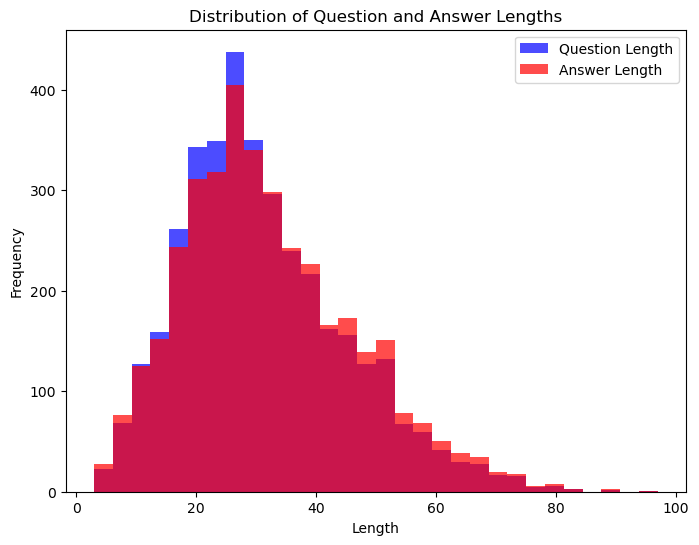

In [55]:
# Visualization:
# Create visualizations to better understand the data distribution (e.g., histograms, word clouds).
# Plot the distribution of question and answer lengths.
# Visualize word frequency using bar plots or word clouds.
# Visualization
plt.figure(figsize=(8, 6))
plt.hist(df['question_length'], bins=30, alpha=0.7, color='blue', label='Question Length')
plt.hist(df['answer_length'], bins=30, alpha=0.7, color='red', label='Answer Length')
plt.title('Distribution of Question and Answer Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

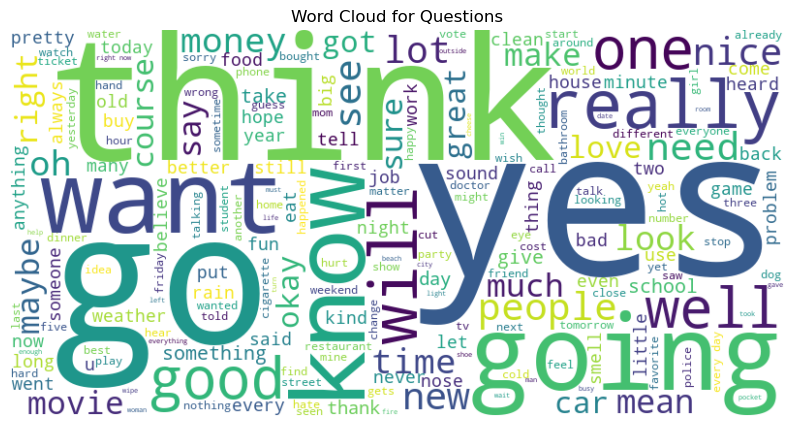

In [57]:
# Word cloud for questions
question_text = ' '.join(df['question'])
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(question_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Questions')
plt.axis('off')
plt.show()

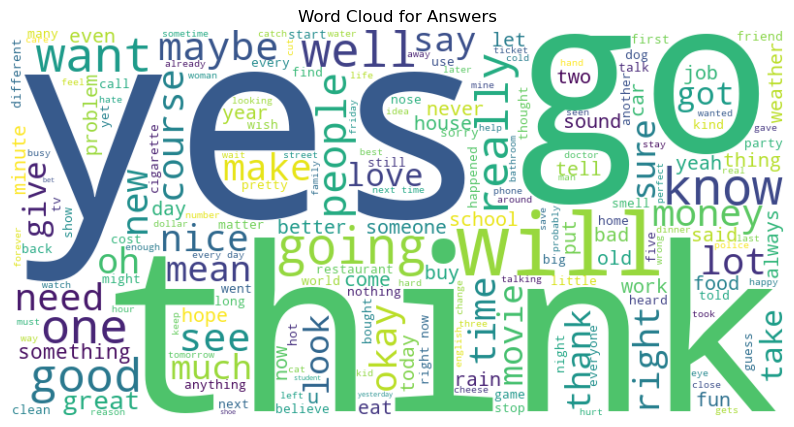

In [59]:
# Word cloud for answers
answer_text = ' '.join(df['answer'])
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(answer_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Answers')
plt.axis('off')
plt.show()

In [63]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob

In [65]:
# Topic Modeling:
# Use techniques like Latent Dirichlet Allocation (LDA) to identify underlying topics in the questions and answers.
# Cluster similar questions and answers based on topic distributions.
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(df['question'])
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)
# Display the top words for each topic
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx}:", ", ".join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]]))

Topic 0: think, really, time, maybe, mean, ve, ll, better, let, doing
Topic 1: like, yes, want, didn, day, right, say, does, just, going
Topic 2: good, know, don, need, sure, course, great, new, haven, won
Topic 3: did, people, lot, school, don, today, really, yes, oh, think
Topic 4: ll, going, okay, nice, money, got, make, car, think, big


In [67]:
#  Language Complexity:
# Measure the complexity of language used in questions and answers (e.g., average word length, vocabulary richness).
# Explore readability scores or linguistic features.
df['question_word_count'] = df['question'].apply(lambda x: len(x.split()))
df['answer_word_count'] = df['answer'].apply(lambda x: len(x.split()))

# Analyze language complexity
avg_question_word_length = df['question'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split())).mean()
avg_answer_word_length = df['answer'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split())).mean()

print("\nAverage word length in questions:", avg_question_word_length)
print("Average word length in answers:", avg_answer_word_length)


Average word length in questions: 4.166390831777154
Average word length in answers: 4.175958407181089


### Data Preprocessing

In [70]:
# Data Augmentation (UPSampling)
# Define the new dialogue data
new_dialogue_data = [
    ["Hi", "Hello"],
    ["How are you?", "I'm good, thanks for asking. How about you?"],
    ["I'm doing well too.", "That's great to hear. What have you been up to lately?"],
    ["Not much, just working and spending time with family.", "That sounds nice. Have you watched any good movies recently?"],
    ["Yeah, I saw a really good one last weekend.", "It was a thriller, right? I heard good things about it."],
    ["Yes, it was.", "Do you want to watch it together sometime?"],
    ["Sure, that sounds like a plan.", "Awesome! Let's plan it for this weekend."],
    ["Sounds good to me.", "Alright then, it's a plan. What time works for you?"],
    ["How about Saturday evening?", "Perfect! Saturday evening it is. I'll book the tickets."],
    ["Great! Looking forward to it.", "Me too. It'll be fun."]
]
new_df = pd.DataFrame(new_dialogue_data, columns=columns)

# Concatenate the new DataFrame with the existing DataFrame
df = pd.concat([df, new_df], ignore_index=True)

# Print the updated DataFrame
df

,question,answer,question_length,answer_length,question_word_count,answer_word_count
0,"hi, how are you doing?",i'm fine. how about yourself?,22.0,29.0,5.0,5.0
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.,29.0,35.0,5.0,6.0
2,i'm pretty good. thanks for asking.,no problem. so how have you been?,35.0,33.0,6.0,7.0
3,no problem. so how have you been?,i've been great. what about you?,33.0,32.0,7.0,6.0
4,i've been great. what about you?,i've been good. i'm in school right now.,32.0,40.0,6.0,8.0
...,...,...,...,...,...,...
3730,"Yes, it was.",Do you want to watch it together sometime?,NaN,NaN,NaN,NaN
3731,"Sure, that sounds like a plan.",Awesome! Let's plan it for this weekend.,NaN,NaN,NaN,NaN
3732,Sounds good to me.,"Alright then, it's a plan. What time works for...",NaN,NaN,NaN,NaN
3733,How about Saturday evening?,Perfect! Saturday evening it is. I'll book the...,NaN,NaN,NaN,NaN


In [72]:
# Preprocessing
# Lowercase
# Tokenization
# Stop words removal
# Lemmization
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')

# Function for preprocessing text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
#     tokens = word_tokenize(text)
#     tokens = [word for word in tokens if word.isalnum()]
#     preprocessed_text = ' '.join(tokens)
    
    return text

# Apply preprocessing to question and answer columns
preprocessed_df = df.copy()
preprocessed_df['question'] = preprocessed_df['question'].apply(preprocess_text)
preprocessed_df['answer'] = preprocessed_df['answer'].apply(preprocess_text)

# Print the preprocessed DataFrame
preprocessed_df

[nltk_data] Downloading package punkt to C:\Users\YEMI-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


,question,answer,question_length,answer_length,question_word_count,answer_word_count
0,"hi, how are you doing?",i'm fine. how about yourself?,22.0,29.0,5.0,5.0
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.,29.0,35.0,5.0,6.0
2,i'm pretty good. thanks for asking.,no problem. so how have you been?,35.0,33.0,6.0,7.0
3,no problem. so how have you been?,i've been great. what about you?,33.0,32.0,7.0,6.0
4,i've been great. what about you?,i've been good. i'm in school right now.,32.0,40.0,6.0,8.0
...,...,...,...,...,...,...
3730,"yes, it was.",do you want to watch it together sometime?,NaN,NaN,NaN,NaN
3731,"sure, that sounds like a plan.",awesome! let's plan it for this weekend.,NaN,NaN,NaN,NaN
3732,sounds good to me.,"alright then, it's a plan. what time works for...",NaN,NaN,NaN,NaN
3733,how about saturday evening?,perfect! saturday evening it is. i'll book the...,NaN,NaN,NaN,NaN


### Classical ML ChatBot

In [75]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(preprocessed_df['question'], preprocessed_df['answer'], test_size=0.2, random_state=42, shuffle=True)

In [77]:
# Model Pipline and training
Pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', RandomForestClassifier())
])

Pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [83]:
Pipe.predict(['where are you going'])[0]

'during the christmas holidays.'

In [85]:
# Predicting text using the pipeline on the test set
predicted_text = Pipe.predict(X_test)

# Creating a DataFrame to compare the first 10 results
comparison_df = pd.DataFrame({'Real Question ': X_test[:10],'Real Generated Text': y_test[:10], 'Predicted Text': predicted_text[:10]})
comparison_df.head(10)

,Real Question,Real Generated Text,Predicted Text
3253,how are you doing that?,i started shopping at the dollar store.,i'm going to change the light bulb. it burnt out.
3190,"the pants are fine, but the pocket has a huge ...",you shouldn't carry your keys and pens in your...,i can't believe that they would lie to us.
2194,uh-oh. that means that she's fat and ugly.,she's cute.,men singers don't have to look good.
3303,that's great. we won't have neighbors on both ...,no pets are allowed.,that doesn't matter. i don't want to sit around.
642,"i really wanted you to come, but i understand.","yeah, maybe next time.",i have things to do.
3214,that's a good deal.,and a one-pound tub of soft butter was the sam...,"yes, even though some of the potatoes had eyes."
184,she's one of the prettiest girls at the school.,what does she look like?,maybe we should learn some good jokes.
3515,"no, that's not the problem.",maybe it will go away in a little while.,someone cut the tires.
3185,why not?,i didn't want to pay for the holes.,because you'll have an accident. most accident...
2206,eight o'clock.,that sounds great.,i have the dvd.


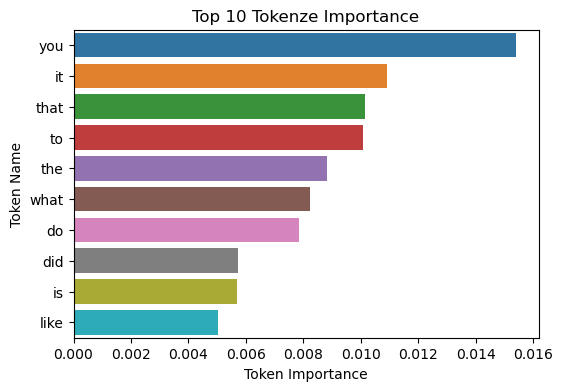

In [87]:
import seaborn as sns

# Visualize Feature Importance
if isinstance(Pipe.named_steps['classifier'], RandomForestClassifier):
    feature_importances = Pipe.named_steps['classifier'].feature_importances_
    feature_names = Pipe.named_steps['tfidf'].get_feature_names_out()

    # Sort feature importances
    sorted_indices = feature_importances.argsort()[::-1]
    top_feature_importances = feature_importances[sorted_indices][:10]
    top_feature_names = np.array(feature_names)[sorted_indices][:10]

    plt.figure(figsize=(6, 4))
    sns.barplot(x=top_feature_importances, y=top_feature_names)
    plt.xlabel('Token Importance')
    plt.ylabel('Token Name')
    plt.title('Top 10 Tokenze Importance')
    plt.show()

In [91]:
# Chat with you ChatBot :
# Uncomment this cell to try it :) 


# Function to get response from chatbot
def get_response(question):
    response = Pipe.predict([question])[0]
    return response

# Function to interact with the user
def chat():
    while True:
        question = input("You: ")
        if question.lower() == 'quit':
            print("Chatbot: Goodbye!")
            break
        response = get_response(question)
        print("Chatbot:", response)

# Start the chat
chat()

You:  quit


Chatbot: Goodbye!


 ### Encoder - Decoder Model with Attention and LSTMs Chatbot from scratch

In [93]:
# !pip install tensorflow -q
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding, Attention, Concatenate

In [95]:
# Seq2Seq Text Preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import unicodedata


nltk.download('punkt')

def unicode_to_ascii(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s)
      if unicodedata.category(c) != 'Mn')

# Function for preprocessing text
def preprocess_text(text):
    # Convert text to lowercase
    text = unicode_to_ascii(text.lower().strip())
    text = re.sub("(\\W)"," ",text) 
    text = re.sub('\S*\d\S*\s*','', text)
    text =  "<sos> " +  text + "<eos>"
    return text

# Apply preprocessing to question and answer columns
preprocessed_df = df.copy()
preprocessed_df['question'] = preprocessed_df['question'].apply(preprocess_text)
preprocessed_df['answer'] = preprocessed_df['answer'].apply(preprocess_text)

# Print the preprocessed DataFrame
preprocessed_df

[nltk_data] Downloading package punkt to C:\Users\YEMI-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,question,answer,question_length,answer_length,question_word_count,answer_word_count
0,<sos> hi how are you doing <eos>,<sos> i m fine how about yourself <eos>,22.0,29.0,5.0,5.0
1,<sos> i m fine how about yourself <eos>,<sos> i m pretty good thanks for asking <eos>,29.0,35.0,5.0,6.0
2,<sos> i m pretty good thanks for asking <eos>,<sos> no problem so how have you been <eos>,35.0,33.0,6.0,7.0
3,<sos> no problem so how have you been <eos>,<sos> i ve been great what about you <eos>,33.0,32.0,7.0,6.0
4,<sos> i ve been great what about you <eos>,<sos> i ve been good i m in school right now ...,32.0,40.0,6.0,8.0
...,...,...,...,...,...,...
3730,<sos> yes it was <eos>,<sos> do you want to watch it together sometim...,NaN,NaN,NaN,NaN
3731,<sos> sure that sounds like a plan <eos>,<sos> awesome let s plan it for this weekend ...,NaN,NaN,NaN,NaN
3732,<sos> sounds good to me <eos>,<sos> alright then it s a plan what time wor...,NaN,NaN,NaN,NaN
3733,<sos> how about saturday evening <eos>,<sos> perfect saturday evening it is i ll bo...,NaN,NaN,NaN,NaN


In [97]:
# Tokenizer
# Preprocessing the data
questions = preprocessed_df['question'].values.tolist()
answers = preprocessed_df['answer'].values.tolist()

# Tokenizing the data
tokenizer = Tokenizer(filters='')
tokenizer.fit_on_texts(np.concatenate((questions, answers), axis=0))

vocab_size = len(tokenizer.word_index) + 1

# Convert text to sequences
question_seqs = tokenizer.texts_to_sequences(questions)
answer_seqs = tokenizer.texts_to_sequences(answers)

# Padding sequences for equal length
# Pad sequences for equal length
max_len_question = max(len(seq) for seq in question_seqs)
max_len_answer = max(len(seq) for seq in answer_seqs)
max_len = max(max_len_question, max_len_answer)
print(max(max_len_question, max_len_answer))
# Pad sequences separately for questions and answers
question_seqs = pad_sequences(question_seqs, maxlen=max_len, padding='post')
answer_seqs = pad_sequences(answer_seqs, maxlen=max_len, padding='post')

22


In [99]:
tokenizer.texts_to_sequences("<sos>")

[[], [9], [490], [9], []]

In [101]:
tokenizer.word_index["<sos>"]

1

In [105]:
 # Model Architecture
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding, Attention, Concatenate, Dropout

# Define the model architecture
latent_dim = 256  # Dimensionality of the encoding space

# Encoder
encoder_inputs = Input(shape=(max_len,))
encoder_embedding = Embedding(vocab_size, latent_dim, input_shape=(max_len,))
encoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True, dropout=0.1, recurrent_dropout=0.1)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding(encoder_inputs))
encoder_states = [state_h, state_c]

# Decoder
decoder_inputs = Input(shape=(max_len-1,))
decoder_embedding = Embedding(vocab_size, latent_dim, input_shape=(max_len-1,))
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True, dropout=0.1, recurrent_dropout=0.1)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding(decoder_inputs), initial_state=encoder_states)

# Attention mechanism
attention_layer = Attention()
attention_output = attention_layer([decoder_outputs, encoder_outputs])

# Concatenate attention output and decoder LSTM output
decoder_concat_input = Concatenate(axis=-1)([decoder_outputs, attention_output])

# Add dropout layer for regularization
decoder_concat_input = Dropout(0.1)(decoder_concat_input)

# Output layer
decoder_dense = Dense(vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_concat_input)

C:\Users\YEMI-PC\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [107]:
# Model Training
# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

# Print model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 22)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_1 (InputLayer)    │ (None, 21)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding (Embedding)         │ (None, 22, 256)           │         621,056 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_1 (Embedding)       │ (None, 21, 256)           │         621,056 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm (LSTM)                   │ [(None, 22, 256), (None,  │         525,312 │ embedding[0][0]            │
│                               │ 256), (None, 256)]        │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm_1 (LSTM)                 │ [(None, 21, 256), (None,  │         525,312 │ embedding_1[0][0],         │
│                               │ 256), (None, 256)]        │                 │ lstm[0][1], lstm[0][2]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ attention (Attention)         │ (None, 21, 256)           │               0 │ lstm_1[0][0], lstm[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 21, 512)           │               0 │ lstm_1[0][0],              │
│                               │                           │                 │ attention[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 21, 512)           │               0 │ concatenate[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 21, 2426)          │       1,244,538 │ dropout[0][0]              │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 3,537,274 (13.49 MB)

 Trainable params: 3,537,274 (13.49 MB)

 Non-trainable params: 0 (0.00 B)

In [109]:
# Train the model
model.fit([question_seqs, answer_seqs[:, :-1]], answer_seqs[:, 1:],
          batch_size=64,
          epochs=32,
          validation_split=0.2)

Epoch 1/32
47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 226ms/step - loss: 4.2365 - val_loss: 2.3184
Epoch 2/32
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 208ms/step - loss: 1.9828 - val_loss: 2.2603
Epoch 3/32
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 215ms/step - loss: 1.9391 - val_loss: 2.2415
Epoch 4/32
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 207ms/step - loss: 1.8930 - val_loss: 2.2003
Epoch 5/32
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 212ms/step - loss: 1.8356 - val_loss: 2.1595
Epoch 6/32
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 213ms/step - loss: 1.7642 - val_loss: 2.1182
Epoch 7/32
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 210ms/step - loss: 1.7215 - val_loss: 2.0959
Epoch 8/32
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 211ms/step - loss: 1.6393 - val_loss: 2.0731
Epoch 9/32
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 221ms/step - loss: 1.6041 - val_loss: 2.0690
Epoch 10/32
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 221ms/step - loss: 1.5642 - val_loss: 2.0622
Epoch 11/32
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 213ms/step - loss: 1.5240 - val_loss: 2.0621
Epoch 12/32
47/47 ━━━━━━━━━━━━━━━━━━━━ 10

In [111]:
# Model Prediction Evaluation
# Function to generate a response given a input sentence
def generate_response(input_text):
    # Tokenize the input text
    input_sequence = tokenizer.texts_to_sequences([input_text])
    # Pad the input sequence
    input_sequence = pad_sequences(input_sequence, maxlen=max_len, padding='post')
    
    # Initialize the decoder input sequence with start token
    decoder_input_sequence = np.zeros((1, max_len-1))
    decoder_input_sequence[0, 0] = tokenizer.word_index['<sos>']
    
    # Generate response using the trained model
    for i in range(max_len - 1):
        predictions = model.predict([input_sequence, decoder_input_sequence])
        predicted_id = np.argmax(predictions[0, i, :])
        if predicted_id == tokenizer.word_index['<eos>']:
            break
        decoder_input_sequence[0, i+1] = predicted_id
    
    # Convert output sequence to text
    output_text = ''
    for token_index in decoder_input_sequence[0]:
        if token_index == tokenizer.word_index['<eos>'] or token_index == 0:
            break
        output_text += tokenizer.index_word[token_index] + ' '
    
    return output_text.strip()

# Test the function with input "how are you"
input_text = "how do you do"
response = generate_response(input_text)
print("Response:", response[5:])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Response:  i m going to pcc


### Fine-Tuning a Generative-AI LLM ChatBot

In [115]:
model_name='google/flan-t5-small'

original_model = transformers.AutoModelForSeq2SeqLM.from_pretrained(model_name, torch_dtype=torch.bfloat16)
tokenizer = AutoTokenizer.from_pretrained(model_name)

C:\Users\YEMI-PC\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

C:\Users\YEMI-PC\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\YEMI-PC\.cache\huggingface\hub\models--google--flan-t5-small. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


ImportError: cannot import name 'is_torch_onnx_dict_inputs_support_available' from 'transformers.utils' (C:\Users\YEMI-PC\anaconda3\Lib\site-packages\transformers\utils\__init__.py)

In [ ]:
# It is possible to pull out the number of model parameters and find out how many of them are trainable. 
# The following function can be used to do that, at this stage, you do not need to go into details of it.

def print_number_of_trainable_model_parameters(model):
    trainable_model_params = 0
    all_model_params = 0
    for _, param in model.named_parameters():
        all_model_params += param.numel()
        if param.requires_grad:
            trainable_model_params += param.numel()
    return f"trainable model parameters: {trainable_model_params}\nall model parameters: {all_model_params}\npercentage of trainable model parameters: {100 * trainable_model_params / all_model_params:.2f}%"

print(print_number_of_trainable_model_parameters(original_model))

In [ ]:
# Test the Model with Zero Shot Inferencing
# Test the model with the zero shot inferencing. You can see that the model struggles to summarize the dialogue 
# compared to the baseline summary, but it does pull out some important information from the text which indicates 
# the model can be fine-tuned to the task at hand.

index = 0

question = df['question'][index]
answer = df['answer'][index]

prompt = f"""
Answere the following question.

{question}

Answere:
"""

inputs = tokenizer(prompt, return_tensors='pt')
output = tokenizer.decode(
    original_model.generate(
        inputs["input_ids"], 
        max_new_tokens=22,
    )[0], 
    skip_special_tokens=True
)

dash_line = '-'.join('' for x in range(100))
print(dash_line)
print(f'INPUT PROMPT:\n{prompt}')
print(dash_line)
print(f'BASELINE HUMAN ANSWER:\n{answer}\n')
print(dash_line)
print(f'MODEL GENERATION - ZERO SHOT:\n{output}')

In [ ]:
# Preprocess the Question-Answer Dataset
def tokenize_function(row):
    start_prompt = 'Answer the following question.\n\n'
    end_prompt = '\n\nAnswer: '
    
    # Convert the question to a string if it's a list
    question = ' '.join(row["question"]) if isinstance(row["question"], list) else row["question"]
    
    prompt = start_prompt + question + end_prompt
    row['input_ids'] = tokenizer(prompt, padding="max_length", truncation=True, return_tensors="pt").input_ids[0]
    
    # Assuming "answer" column is already a string, no need for conversion
    row['labels'] = tokenizer(row["answer"], padding="max_length", truncation=True, return_tensors="pt").input_ids[0]
    
    return row


# Tokenize the DataFrame
tokenized_df = df.apply(tokenize_function, axis=1)

# Convert tensors to lists
tokenized_df = tokenized_df[:-150]
tokenized_df = tokenized_df.drop(index=708)
tokenized_df['input_ids'] = tokenized_df['input_ids'].apply(lambda x: x.tolist())
tokenized_df['labels'] = tokenized_df['labels'].apply(lambda x: x.tolist())


In [ ]:
from datasets import Dataset

# Assuming `tokenized_df` is your pandas DataFrame
dataset = Dataset.from_pandas(tokenized_df)

In [ ]:
tokenized_datasets = dataset.map(tokenize_function, batched=True, batch_size=512)
tokenized_datasets = tokenized_datasets.remove_columns(['question', 'answer',])

In [ ]:
dataset.shape

In [ ]:
dataset

In [ ]:
# Fine-Tune the Model with the Preprocessed Dataset
# Now utilize the built-in Hugging Face Trainer class. Pass the preprocessed dataset with reference to the original model. 
# Other training parameters are found experimentally and there is no need to go into details about those at the moment.

output_dir = f'/kaggle/working/LLM'

training_args = TrainingArguments(
    output_dir=output_dir,
    learning_rate=1e-5,
    num_train_epochs=3,       # Increase the number of training epochs to 3
    weight_decay=0.01,
    logging_steps=50,
    max_steps=1000           # Increase the maximum number of training steps to 1000
)


trainer = Trainer(
    model=original_model,
    args=training_args,
    train_dataset=dataset,
)

In [ ]:
trainer.train()
model_path ="./t5-question-answere-checkpoint"

trainer.model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)

In [ ]:
# Create an instance of the AutoModelForSeq2SeqLM class for the instruct model:

instruct_model = AutoModelForSeq2SeqLM.from_pretrained("/kaggle/working/LLM/checkpoint-1000", torch_dtype=torch.bfloat16)

In [ ]:
# Evaluate the Model Qualitatively (Human Evaluation)
# As with many GenAI applications, a qualitative approach where you ask yourself the question 
# "Is my model behaving the way it is supposed to?" is usually a good starting point. In the example
# below (the same one we started this notebook with), you can see how the fine-tuned model is able to create a reasonable 
# summary of the dialogue compared to the original inability to understand what is being asked of the model.

index = 1

question = df['question'][index]
answer = df['answer'][index]

prompt = f"""
Answere the following question.

{question}

Answere:
"""

input_ids = tokenizer(prompt, return_tensors="pt").input_ids

# Move input_ids tensor to the same device as the model
input_ids = input_ids.to(original_model.device)

# Generate outputs using the original model
original_model_outputs = original_model.generate(input_ids=input_ids, generation_config=GenerationConfig(max_new_tokens=22, num_beams=1))
original_model_text_output = tokenizer.decode(original_model_outputs[0], skip_special_tokens=True)

input_ids = input_ids.to(instruct_model.device)
# Generate outputs using the instruct model
instruct_model_outputs = instruct_model.generate(input_ids=input_ids, generation_config=GenerationConfig(max_new_tokens=22, num_beams=1))
instruct_model_text_output = tokenizer.decode(instruct_model_outputs[0], skip_special_tokens=True)

# Print the results
print(dash_line)
print(f'BASELINE HUMAN QUERY:\n{question}')
print(dash_line)
print(f'BASELINE HUMAN ANSWER:\n{answer}')
print(dash_line)
print(f'ORIGINAL MODEL:\n{original_model_text_output}')
print(dash_line)
print(f'INSTRUCT MODEL:\n{instruct_model_text_output}')

In [ ]:
# Evaluate the Model Quantitatively (with ROUGE Metric)
# The ROUGE metric helps quantify the validity of summarizations produced by models. It compares summarizations 
# to a "baseline" summary which is usually created by a human. While not perfect, it does indicate the overall increase
# in summarization effectiveness that we have accomplished by fine-tuning.

rouge = evaluate.load('rouge')

In [ ]:
Generate the outputs for the sample of the test dataset (only 5 dialogues and summaries to save time), and save the results.

question = dataset['question'][0:5]
human_baseline_answer = dataset['answer'][0:5]

original_model_answer = []
instruct_model_answer = []

for _, question in enumerate(question):
    prompt = f"""
Complete the following query.

{question}

Summary: """
    input_ids = tokenizer(prompt, return_tensors="pt").input_ids
    input_ids = input_ids.to(original_model.device)

    original_model_outputs = original_model.generate(input_ids=input_ids, generation_config=GenerationConfig(max_new_tokens=200))
    original_model_text_output = tokenizer.decode(original_model_outputs[0], skip_special_tokens=True)
    original_model_answer.append(original_model_text_output)
    input_ids = input_ids.to(instruct_model.device)

    instruct_model_outputs = instruct_model.generate(input_ids=input_ids, generation_config=GenerationConfig(max_new_tokens=200))
    instruct_model_text_output = tokenizer.decode(instruct_model_outputs[0], skip_special_tokens=True)
    instruct_model_answer.append(instruct_model_text_output)
    
zipped_answers = list(zip(human_baseline_answer, original_model_answer, instruct_model_answer))
 
dataframe = pd.DataFrame(zipped_answers, columns = ['human_baseline_summaries', 'original_model_summaries', 'instruct_model_summaries'])
dataframe

In [ ]:
# Evaluate the models computing ROUGE metrics. Notice the improvement in the results!

original_model_results = rouge.compute(
    predictions=original_model_answer,
    references=human_baseline_answer[0:len(original_model_answer)],
    use_aggregator=True,
    use_stemmer=True,
)

instruct_model_results = rouge.compute(
    predictions=instruct_model_answer,
    references=human_baseline_answer[0:len(instruct_model_answer)],
    use_aggregator=True,
    use_stemmer=True,
)

print('ORIGINAL MODEL:')
print(original_model_results)
print('INSTRUCT MODEL:')
print(instruct_model_results)

In [ ]:
# The results show substantial improvement in all ROUGE metrics:

print("Absolute percentage improvement of INSTRUCT MODEL over HUMAN BASELINE")

improvement = (np.array(list(instruct_model_results.values())) - np.array(list(original_model_results.values())))
for key, value in zip(instruct_model_results.keys(), improvement):
    print(f'{key}: {value*100:.2f}%')